# 01) 워드 임베딩(Word Embedding)

- 단어를 벡터로 표현하는 방법으로, 단어를 밀집 표현으로 변환

## 1. 희소 표현(Sparse Representation)

- 정의:
  - 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법
- 예시:
  - 원-핫 벡터
- 문제점:
  - 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점
    - 낭비가 많아짐

## 2. 밀집 표현(Dense Representation)

- 특징:
  - 벡터의 차원을 단어 집합의 크기로 상정하지 않는다.
  - 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞품

## 3. 워드 임베딩(Word Embedding)

- 정의:
  - 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법
- 예시:
  -  LSA, Word2Vec, FastText, Glove

# 02) 워드투벡터(Word2Vec)


## 1. 희소 표현(Sparse Representation)

- 각 단어 벡터간 유의미한 유사성을 표현할 수 없다는 단점

- 01) 워드 임베딩 참고

## 2. 분산 표현(Distributed Representation)


- 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용
- 분포 가설(distributional hypothesis) 가정 하에 만들어진 표현 방법
  - 분포가설: 
    - 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다
- 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듬
- 요약
  - 저차원에 단어의 의미를 여러 차원에다가 분산 하여 표현
  - 단어 벡터 간 유의미한 유사도를 계산할 수
  - 이런 방식의 예가 워드투벡임
  


## 3. CBOW(Continuous Bag of Words)


- Word2Vec방법
  1. CBOW(Continuous Bag of Words)
    - 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측
  2. Skip-Gram
    - 중간에 있는 단어들을 입력으로 주변 단어들을 예측
- 예시(CBOW)
  - 예문 : "The fat cat sat on the mat"
  - \['The', 'fat', 'cat', 'on', 'the', 'mat']으로부터 sat을 예측하는 것
  - sat: 중심 단어
  - 예측에 사용되는 단어들:  주변 단어(context word)
  - 몇 개의 단어를 볼지의 범위 : 원도우(window)
    - 윈도우 크기가 n이면 주변 단어는 2n임
  - 슬라이딩 윈도우(sliding window):
    - 윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋을 만드는데 이 방법
  

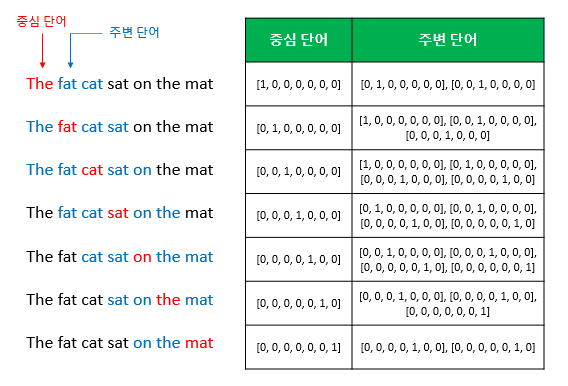

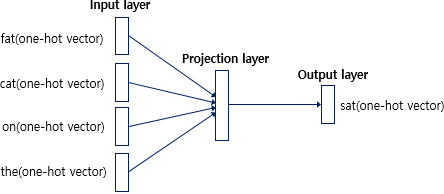

- CBOW의 인공 신경망(크게보기)
  -  입력층(Input layer):
    -  주변 단어들의 원-핫 벡터가 들어감
  - 은닉층:
    - 은닉층이 다수인 딥 러닝(deep learning) 모델이 아니라 은닉층이 1개인 얕은 신경망(shallow neural network)
    - 활성화 함수가 존재하지 않음
    - 룩업 테이블이라는 연산을 담당하는 층으로 투사층(projection layer)이라고 부르기도

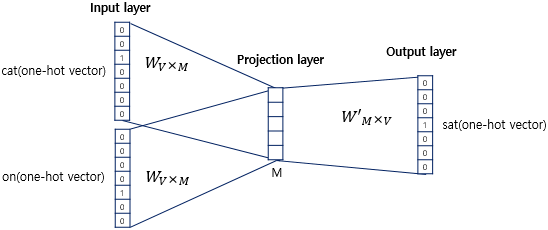

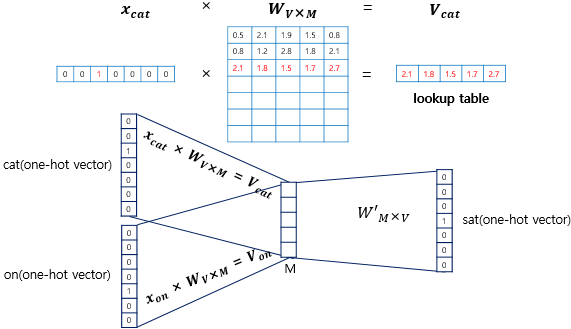

- CBOW의 인공 신경망(자세히 보기)
  1. 투사층의 크기가 M
    - M은 임베딩하고 난 벡터의 차원
  2. 가중치
    1. 입력층과 투사층 사이의 가중치 W는 V × M 행렬
    2. 투사층에서 출력층사이의 가중치 W'는 M × V 행렬
    -  V: 단어 집합의 크기
    - W,W'은 서로  다른 행렬임 전치 행렬 아님
    

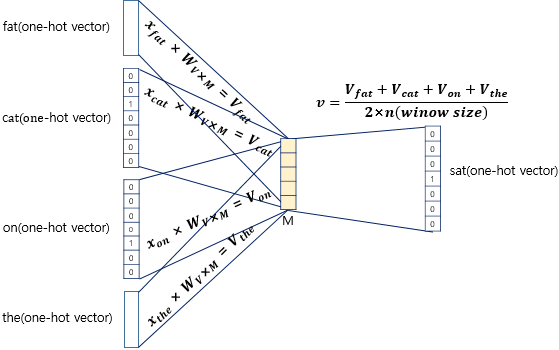

- 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됨
  - 사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점
- 이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐
- CBOW는 소프트맥스(softmax) 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1이 됨

- CBOW의 손실 함수(loss function)
  - 크로스 엔트로피(cross-entropy) 함수
  - $cost(\hat{𝑦}, y) = -\sum_{j=1}^{V}y_{j}\ log(\hat{𝑦_{j}})$


## 4. Skip-gram


- 중심 단어에서 주변 단어를 예측

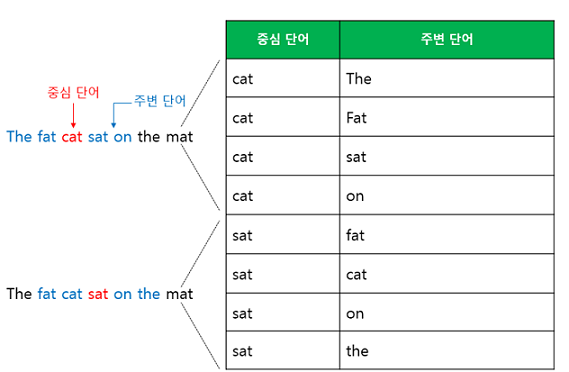
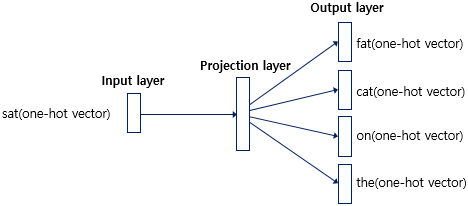

## 5. NNLM Vs. Word2Vec

-  NNLM:
  - 피드 포워드 신경망 언어 모델
  - 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입
- 차이:
  1. 예측하는 대상
    -  NNLM: 다음 단어를 예측하는 언어 모델이 목적
    - Word2Vec(CBOW): 
      - 워드 임베딩 자체가 목적
      -  다음 단어가 아닌 중심 단어
  2. 구조
  
  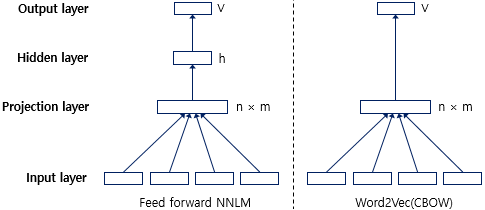
    - Word2Vec: NNLM에 존재하던 활성화 함수가 있는 은닉층을 제거
  3. 속도
    - Word2Vec이 NNLM보다 학습 속도에서 강점
      1. 은닉층을 제거
      2. 계층적 소프트맥스(hierarchical softmax)와 네거티브 샘플링(negative sampling)기법의 사용
    - NNLM:(n × m) + (n × m × h) + (h × V)
    - Word2Vec : (n × m) + (m × log(V))

# 03) 영어/한국어 Word2Vec 실습


## 1. 영어 Word2Vec 만들기


In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 1) 훈련 데이터 이해하기
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

#-------------------------------------------------------------------------------
# 2) 훈련 데이터 전처리하기
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]
print('총 샘플의 개수 : {}'.format(len(result)))

# 샘플 3개만 출력
for line in result[:3]:
    print(line)
#-------------------------------------------------------------------------------
#3) Word2Vec 훈련시키기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result,
                 size=100,#size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
                 window=5,#window = 컨텍스트 윈도우 크기
                 min_count=5,#min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
                 workers=4,#workers = 학습을 위한 프로세스 수
                 sg=0)# sg = 0은 CBOW, 1은 Skip-gram.

model_result = model.wv.most_similar("man")
print(model_result)

#-------------------------------------------------------------------------------
#4) Word2Vec 모델 저장하고 로드하기
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

model_result = loaded_model.most_similar("man")
print(model_result)

총 샘플의 개수 : 273424
['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']
[('woman', 0.8568786382675171), ('guy', 0.8087667226791382), ('lady', 0.7652746438980103), ('boy', 0.7362508177757263), ('soldier', 0.7350218296051025), ('girl', 0.7328444719314575), ('gentleman', 0.7143740653991699), ('kid', 0.6882626414299011), ('friend', 0.6668955683708191), ('king', 0.6469627618789673)]
[('woman', 0.8568786382675171), ('guy', 0.8087667226791382), ('lady', 0.7652746438980103), ('boy', 0.7362508177757263), ('soldier', 0.7350218296051025), ('girl', 0.7328444719314575), ('gentleman', 0.7143740653991699), ('kid', 0.68826

## 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)


In [ ]:
!pip install konlpy

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 497 kB/s 
     |████████████████████████████████| 448 kB 68.9 MB/s 


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

# NULL 값 존재 유무
print(train_data.isnull().values.any())

train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

print(len(train_data)) # 리뷰 개수 출력

# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

200000
True
False
199992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
from tqdm import tqdm

100%|██████████| 199992/199992 [14:35<00:00, 228.53it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


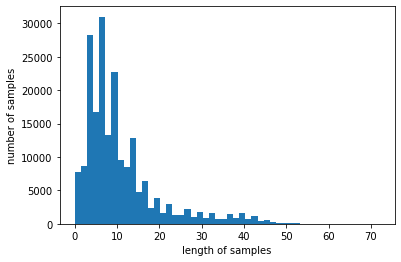

In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()    

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))
print(model.wv.most_similar("히어로"))

[('안성기', 0.8731237053871155), ('김명민', 0.8443524837493896), ('한석규', 0.838287353515625), ('이민호', 0.8218058347702026), ('양동근', 0.8203393220901489), ('송강호', 0.8119019269943237), ('이문식', 0.8106228113174438), ('서영희', 0.8102943897247314), ('김수현', 0.8082470893859863), ('출중하다', 0.8022764921188354)]
[('호러', 0.881597638130188), ('슬래셔', 0.8774335384368896), ('무협', 0.8545586466789246), ('느와르', 0.8374330997467041), ('블록버스터', 0.8313633799552917), ('정통', 0.8210785388946533), ('무비', 0.8179081678390503), ('물의', 0.814979076385498), ('물', 0.8112465739250183), ('헐리우드', 0.8078160285949707)]


## 3. 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개

- 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수

- 모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit



In [ ]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print(word2vec_model.vectors.shape)
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))
print(word2vec_model['book'])

# 04) 네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)


## 1. 네거티브 샘플링(Negative Sampling)


- Word2Vec의 출력층
  1. 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차구함
  2. 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트
  - 단어가 많아지면 Word2Vec은 학습하기에 무거운 모델
- Word2Vec의 역전파 과정
  - 모든 단어의 임베딩 벡터값의 업데이트를 수행
  - 연관성이 없는 단어의 임베딩 벡터값까지 업데이트하는 것은 비효율적

- 정의:
  - Word2Vec이 학습 과정에 일부 단어 집합에만 집중할 수 있도록 하는 방법
- 특징:
  - 중심 단어에 대해서 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 변환
  - 주변 단어들을 긍정(positive), 랜덤으로 샘플링 된 단어들을 부정(negative)으로 레이블링한다면 이진 분류 문제를 위한 데이터셋이 됨

## 2. 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)

- Skip-gram
  - 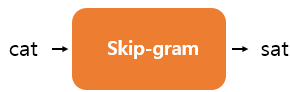
-  SGNS
  - 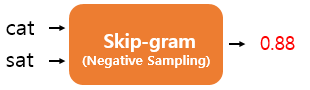
  - 중심 단어와 주변 단어가 모두 입력
  - 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 그 확률을 예측 

- Skip-gram 데이터셋을 SGNS의 데이터셋으로 바꾸는 과정
  1. 기존의 Skip-gram 데이터셋에서 중심 단어와 주변 단어를 각각 입력1, 입력2
    - 윈도우 크기 내에서 이웃 관계였므로 레이블은 1
  2. 단어 집합에서 랜덤으로 선택한 단어들을 입력2, 레이블 0
  3. 두 개의 임베딩 테이블을 준비
    - 두 임베딩 테이블은 훈련 데이터의 단어 집합의 크기를 가지므로 크기가 같음
    - 하나는 입력 1인 중심 단어의 테이블 룩업을 위한 임베딩 테이블
    - 하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블
  4. 각 단어는 각 임베딩 테이블을 테이블 룩업하여 임베딩 벡터로 변환
  5. 중심 단어와 주변 단어의 내적값을 이 모델의 예측값으로 하고, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트
  - 좌측의 임베딩 행렬을 임베딩 벡터로 사용할 수
  - 두 행렬을 더한 후 사용하거나 두 행렬을 연결(concatenate)해서 사용할 수

 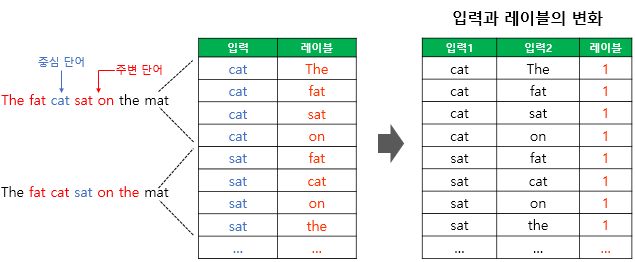

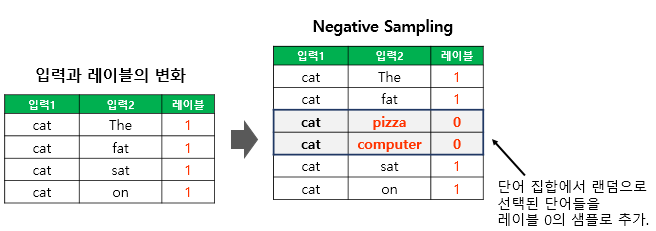

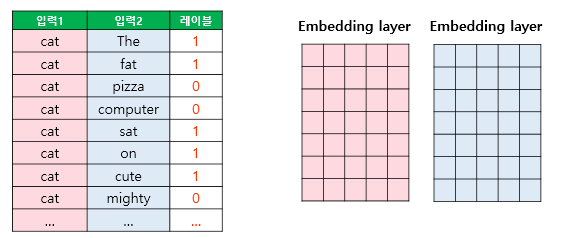
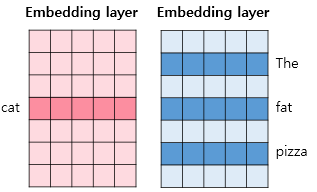

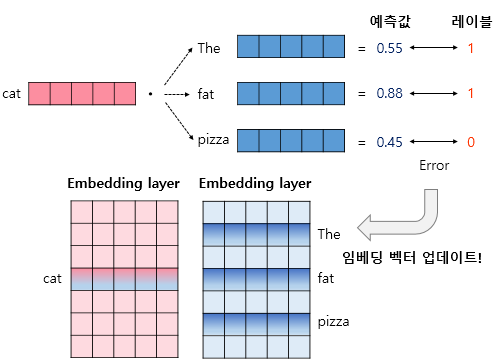

## 3. 20뉴스그룹 데이터 전처리하기


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
# 하나의 샘플에 최소 단어 2개
  # 중심단어와 주변단어의 ㅁ관계가 성립하여야 하기에
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :', len(documents))

news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df.isnull().values.any()

총 샘플 수 : 11314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


False

In [26]:
news_df.replace("", float("NaN"), inplace=True) #빈 값 확인
news_df.isnull().values.any()

True

In [27]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [28]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [30]:
# 단어집 크기 확인
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


## 4. 네거티브 샘플링을 통한 데이터셋 구성하기


- 케라스에서 제공하는 전처리 도구인 skipgrams를 사용

In [31]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]
#10개만 함

In [32]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(lived (1148), media (702)) -> 1
(world (70), reputation (5533)) -> 1
(makes (228), power (68)) -> 1
(inhuman (10668), privledged (41415)) -> 0
(media (702), wasted (6304)) -> 0


In [33]:
print('전체 샘플 수 :',len(skip_grams))

# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

전체 샘플 수 : 10
2220
2220


In [34]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

## 5. Skip-Gram with Negative Sampling(SGNS) 구현하기

In [35]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [36]:
# 임베딩 벡터의 차원은 100 : 사용자가 정하는 파라미터
embed_size = 100

# 모델 설계
# 두 개의 임베딩 테이블 생성
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       6427700     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       6427700     ['input_4[0][0]']                
                                                                                            

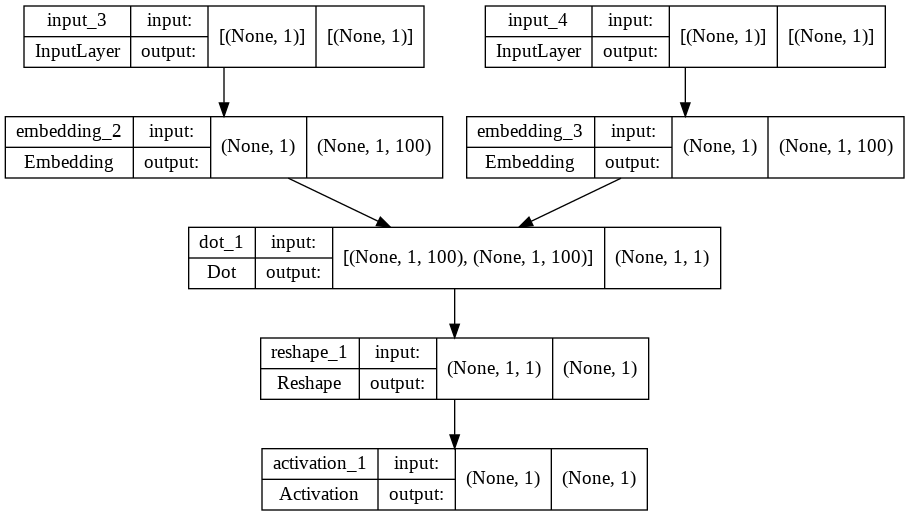

In [37]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [38]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4628.728299403563
Epoch : 2 Loss : 3678.3971074968576
Epoch : 3 Loss : 3521.8873847480863
Epoch : 4 Loss : 3313.023314913735
Epoch : 5 Loss : 3087.4613753296435


## 6. 결과 확인하기


In [39]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

w2v.most_similar(positive=['soldiers'])

[('wounded', 0.8479255437850952),
 ('massacre', 0.8026717305183411),
 ('troops', 0.7886186242103577),
 ('slaughtered', 0.7872488498687744),
 ('palestinian', 0.7845036387443542),
 ('irgun', 0.7832902669906616),
 ('brutally', 0.7792952060699463),
 ('arab', 0.7752526998519897),
 ('occupation', 0.7747862339019775),
 ('nazi', 0.7744950652122498)]

# 05) 글로브(GloVe)


- 카운트 기반과 예측 기반을 모두 사용하는 방법론
-  Word2Vec와 GloVe 중에서 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용

## 1. 기존 방법론에 대한 비판

- LSA
  -  카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려
  - 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어짐
- Word2Vec
  - 예측 기반으로 단어 간 유추
  - 코퍼스의 전체적인 통계 정보를 반영하지 못함
    - 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려

- GloVe
  - 카운트 기반의 방법(LSA)과 예측 기반의 방법론(Word2Vec) 두 가지를 모두 사용

## 2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

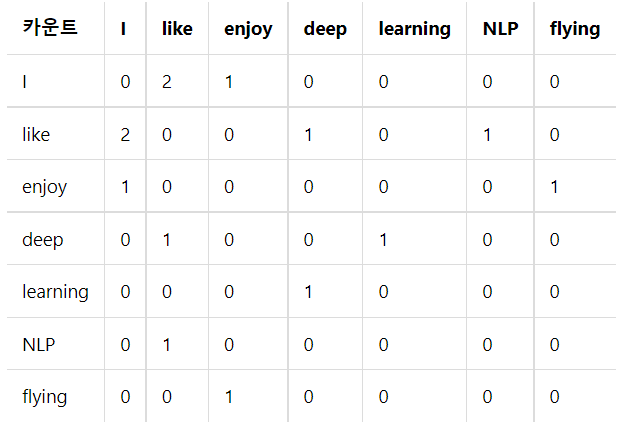

- 동시 등장 행렬: 
  - 행과 열을 전체 단어 집합의 단어들로 구성
  - i행 k열 값 \= i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수 

## 3. 동시 등장 확률(Co-occurrence Probability)


- $P(k\ |\ i)$
  - i: 중심 단어(Center Word)
  - k: 주변 단어(Context Word)
  - 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값

## 4. 손실 함수(Loss function)


- 용어
  - $X$: 동시 등장 행렬(Co-occurrence Matrix)
  - $X_{ij}$:중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
  - $X_{i} : \sum_j X_{ij}$: i행의 값을 모두 더한 값
  - $P_{ik}$: $P(k\ |\ i)$=$\frac{X_{ik}}{X_{i}}$:중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률
    - P(solid l ice) = 단어 ice가 등장했을 때 단어 solid가 등장할 확률
  - $\frac{P_{ik}}{P_{jk}}$
    - P(solid l ice) / P(solid l steam) = 8.9
  - $w_{i}$: 중심 단어 i의 임베딩 벡터
  - $\tilde{w_{k}}$: 주변 단어 k의 임베딩 벡터
- GloVe: 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것
- $Loss\ function = \sum_{m, n=1}^{V}\ f(X_{mn})(w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$
  - 도출 식은 차후에 공부 필요

## 5. GloVe 훈련시키기


In [18]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 7.3 MB/s 


In [39]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5) #영어와 한국어 Word2Vec 학습하기 전처히 결과 result에 저장됨 
glove = Glove(no_components=100, learning_rate=0.05)


# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

print(glove.most_similar("man"))

# 06) 패스트텍스트(FastText)


- Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주

## 1. 내부 단어(subword)의 학습


- 각 단어는 글자 단위 n-gram의 구성으로 취급
- n을 몇으로 결정하는지에 따라서 단어들이 얼마나 분리되는지 결정
```
# n = 3인 경우
<ap, app, ppl, ple, le>, <apple>
```
- n을 범위로 설정 가능함
```
# n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>
```
- apple의 벡터값은 저 위 벡터값들의 총 합으로 구성



## 2. 모르는 단어(Out Of Vocabulary, OOV)에 대한 대응

- 데이터 셋만 충분한다면 위와 같은 내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산할 수
  - FastText의 인공 신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩이 되어서

## 3. 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응

-  n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값
- 노이즈가 많은 코퍼스에서 강점을 가진 것

## 4. 실습으로 비교하는 Word2Vec Vs. FastText


In [40]:
# Word2Vec
model.wv.most_similar("electrofishing")

#KeyError: "word 'electrofishing' not in vocabulary"

In [ ]:
# FastText
model.wv.most_similar("electrofishing")

#[('electrolux', 0.7934642434120178), ('electrolyte', 0.78279709815979), ('electro', 0.779127836227417), ('electric', 0.7753111720085144), ('airbus', 0.7648627758026123), ('fukushima', 0.7612422704696655), ('electrochemical', 0.7611693143844604), ('gastric', 0.7483425140380859), ('electroshock', 0.7477173805236816), ('overfishing', 0.7435552477836609)]

## 5. 한국어에서의 FastText


In [ ]:
# 음절 단위
<자연, 자연어, 연어처, 어처리, 처리>

#(2) 자모 단위
분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _
  #3-gram
< ㅈ ㅏ, ㅈ ㅏ _, ㅏ _ ㅇ, ... 중략>

# 07) 자모 단위 한국어 FastText 학습하기


- 나중에 공부 필여